# Aposentadoria

## Etapas

- Passo 1: Importar as bibliotecas
- Passo 2: Entender o que os dados estão apresentando
- passo 3: Corrigir os dados
- Passo 4: Extrair as informações com anotação


In [2]:
import pandas as pd
from matplotlib.pyplot import figure

In [3]:
dados = pd.read_csv("aposentadoria.csv", sep=';')
dados.head()

,siape,nome_oficial,sexo,categoria,classe_funcional,descricao_cargo,unidade,locacao,data_previsao_aposentadoria,previsao_idade,regra_aposentadoria
0,2155224,ABNER CARLOS COSTA DE MELO,M,Técnico Administrativo,D,TECNICO EM ELETROTECNICA,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,24/04/2055,64,Voluntária por idade e tempo de contribuição -...
1,2155224,ABNER CARLOS COSTA DE MELO,M,Técnico Administrativo,D,TECNICO EM ELETROTECNICA,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,15/01/2056,65,Voluntária por idade e tempo de contribuição
2,2155224,ABNER CARLOS COSTA DE MELO,M,Técnico Administrativo,D,TECNICO EM ELETROTECNICA,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,16/01/2066,75,Compulsória
3,1668850,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,M,Docente,Classe C - Adjunto,PROFESSOR DO MAGISTERIO SUPERIOR,CERES - DEPARTAMENTO DE HISTÓRIA,CERES - DEPARTAMENTO DE HISTÓRIA,05/03/2045,65,Voluntária por idade e tempo de contribuição
4,1668850,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,M,Docente,Classe C - Adjunto,PROFESSOR DO MAGISTERIO SUPERIOR,CERES - DEPARTAMENTO DE HISTÓRIA,CERES - DEPARTAMENTO DE HISTÓRIA,24/01/2047,66,Voluntária por idade e tempo de contribuição -...


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24708 entries, 0 to 24707
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   siape                        24708 non-null  int64 
 1   nome_oficial                 24708 non-null  object
 2   sexo                         24708 non-null  object
 3   categoria                    24708 non-null  object
 4   classe_funcional             24708 non-null  object
 5   descricao_cargo              24708 non-null  object
 6   unidade                      24708 non-null  object
 7   locacao                      24708 non-null  object
 8   data_previsao_aposentadoria  24708 non-null  object
 9   previsao_idade               24708 non-null  int64 
 10  regra_aposentadoria          24708 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.1+ MB


### corrigindo os dados

In [5]:
dados['data_previsao_aposentadoria'].str[6:10]

0        2055
1        2056
2        2066
3        2045
4        2047
         ... 
24703    2034
24704    2039
24705    2036
24706    2042
24707    2049
Name: data_previsao_aposentadoria, Length: 24708, dtype: object

In [6]:
dados['ano_previsao_aposentadoria'] = dados['data_previsao_aposentadoria'].str[6:10]

In [7]:
dados['ano_previsao_aposentadoria'] = pd.to_numeric(dados['ano_previsao_aposentadoria'])

In [8]:
dados['ano_previsao_aposentadoria'].astype('int32')

0        2055
1        2056
2        2066
3        2045
4        2047
         ... 
24703    2034
24704    2039
24705    2036
24706    2042
24707    2049
Name: ano_previsao_aposentadoria, Length: 24708, dtype: int32

In [9]:
dados.set_index("regra_aposentadoria")
dados.head()

,siape,nome_oficial,sexo,categoria,classe_funcional,descricao_cargo,unidade,locacao,data_previsao_aposentadoria,previsao_idade,regra_aposentadoria,ano_previsao_aposentadoria
0,2155224,ABNER CARLOS COSTA DE MELO,M,Técnico Administrativo,D,TECNICO EM ELETROTECNICA,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,24/04/2055,64,Voluntária por idade e tempo de contribuição -...,2055
1,2155224,ABNER CARLOS COSTA DE MELO,M,Técnico Administrativo,D,TECNICO EM ELETROTECNICA,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,15/01/2056,65,Voluntária por idade e tempo de contribuição,2056
2,2155224,ABNER CARLOS COSTA DE MELO,M,Técnico Administrativo,D,TECNICO EM ELETROTECNICA,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,16/01/2066,75,Compulsória,2066
3,1668850,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,M,Docente,Classe C - Adjunto,PROFESSOR DO MAGISTERIO SUPERIOR,CERES - DEPARTAMENTO DE HISTÓRIA,CERES - DEPARTAMENTO DE HISTÓRIA,05/03/2045,65,Voluntária por idade e tempo de contribuição,2045
4,1668850,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,M,Docente,Classe C - Adjunto,PROFESSOR DO MAGISTERIO SUPERIOR,CERES - DEPARTAMENTO DE HISTÓRIA,CERES - DEPARTAMENTO DE HISTÓRIA,24/01/2047,66,Voluntária por idade e tempo de contribuição -...,2047


In [10]:
dados['sexo'].value_counts(normalize=True).map('{:.2%}'.format)

M    51.43%
F    48.57%
Name: sexo, dtype: object

In [11]:
dados['classe_funcional'].value_counts()

D                          6068
E                          4368
Classe D - Associado       3595
Classe C - Adjunto         2718
C                          2644
Classe E - Titular         1833
DIV                         635
B                           594
A                           521
DIII                        443
Classe A - Adjunto A        425
DV                          261
Classe B - Assistente       232
Classe A - Auxiliar         155
DI                          106
Classe A - Assistente A      62
DII                          35
Não Informada                13
Name: classe_funcional, dtype: int64

In [12]:
dados[dados['sexo'] == 'M']

,siape,nome_oficial,sexo,categoria,classe_funcional,descricao_cargo,unidade,locacao,data_previsao_aposentadoria,previsao_idade,regra_aposentadoria,ano_previsao_aposentadoria
0,2155224,ABNER CARLOS COSTA DE MELO,M,Técnico Administrativo,D,TECNICO EM ELETROTECNICA,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,24/04/2055,64,Voluntária por idade e tempo de contribuição -...,2055
1,2155224,ABNER CARLOS COSTA DE MELO,M,Técnico Administrativo,D,TECNICO EM ELETROTECNICA,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,15/01/2056,65,Voluntária por idade e tempo de contribuição,2056
2,2155224,ABNER CARLOS COSTA DE MELO,M,Técnico Administrativo,D,TECNICO EM ELETROTECNICA,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,16/01/2066,75,Compulsória,2066
3,1668850,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,M,Docente,Classe C - Adjunto,PROFESSOR DO MAGISTERIO SUPERIOR,CERES - DEPARTAMENTO DE HISTÓRIA,CERES - DEPARTAMENTO DE HISTÓRIA,05/03/2045,65,Voluntária por idade e tempo de contribuição,2045
4,1668850,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,M,Docente,Classe C - Adjunto,PROFESSOR DO MAGISTERIO SUPERIOR,CERES - DEPARTAMENTO DE HISTÓRIA,CERES - DEPARTAMENTO DE HISTÓRIA,24/01/2047,66,Voluntária por idade e tempo de contribuição -...,2047
...,...,...,...,...,...,...,...,...,...,...,...,...
24697,350630,ZORANO SERGIO DE SOUZA,M,Docente,Classe E - Titular,PROFESSOR DO MAGISTERIO SUPERIOR,DEPARTAMENTO DE GEOLOGIA,DEPARTAMENTO DE GEOLOGIA,23/07/2024,65,Voluntária com totalidade da remuneração e par...,2024
24698,350630,ZORANO SERGIO DE SOUZA,M,Docente,Classe E - Titular,PROFESSOR DO MAGISTERIO SUPERIOR,DEPARTAMENTO DE GEOLOGIA,DEPARTAMENTO DE GEOLOGIA,23/07/2024,65,Voluntária por idade e tempo de contribuição,2024
24699,350630,ZORANO SERGIO DE SOUZA,M,Docente,Classe E - Titular,PROFESSOR DO MAGISTERIO SUPERIOR,DEPARTAMENTO DE GEOLOGIA,DEPARTAMENTO DE GEOLOGIA,28/03/2027,67,Voluntária integral média sem paridade - Art 2...,2027
24700,350630,ZORANO SERGIO DE SOUZA,M,Docente,Classe E - Titular,PROFESSOR DO MAGISTERIO SUPERIOR,DEPARTAMENTO DE GEOLOGIA,DEPARTAMENTO DE GEOLOGIA,28/03/2027,67,Voluntária com totalidade da remuneração e par...,2027


In [13]:
dados.loc[(dados.sexo == 'M') & (dados.previsao_idade >= 75)]

,siape,nome_oficial,sexo,categoria,classe_funcional,descricao_cargo,unidade,locacao,data_previsao_aposentadoria,previsao_idade,regra_aposentadoria,ano_previsao_aposentadoria
2,2155224,ABNER CARLOS COSTA DE MELO,M,Técnico Administrativo,D,TECNICO EM ELETROTECNICA,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,16/01/2066,75,Compulsória,2066
5,1668850,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,M,Docente,Classe C - Adjunto,PROFESSOR DO MAGISTERIO SUPERIOR,CERES - DEPARTAMENTO DE HISTÓRIA,CERES - DEPARTAMENTO DE HISTÓRIA,06/03/2055,75,Compulsória,2055
34,6345784,ADAILDO GOMES D ASSUNCAO,M,Docente,Classe E - Titular,PROFESSOR DO MAGISTERIO SUPERIOR,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES,03/06/2027,75,Compulsória,2027
37,2411236,ADAILSON DA SILVA ISIDRO,M,Técnico Administrativo,D,ASSISTENTE EM ADMINISTRACAO,DIREÇÃO DO CCSA,DIREÇÃO DO CCSA,17/01/2062,75,Compulsória,2062
44,2237409,ADALBERTO ALMEIDA DE ARAUJO JUNIOR,M,Técnico Administrativo,D,TECNICO EM ARTES GRAFICAS,SECRETARIA DE EDUCAÇÃO A DISTÂNCIA,SECRETARIA DE EDUCAÇÃO A DISTÂNCIA,06/05/2068,75,Compulsória,2068
...,...,...,...,...,...,...,...,...,...,...,...,...
24657,1868020,ZENEWTON ANDRE DA SILVA GAMA,M,Docente,Classe D - Associado,PROFESSOR DO MAGISTERIO SUPERIOR,DEPARTAMENTO DE SAÚDE COLETIVA,DEPARTAMENTO DE SAÚDE COLETIVA,25/04/2056,75,Compulsória,2056
24663,1047726,ZEU PALMEIRA SOBRINHO,M,Docente,Classe D - Associado,PROFESSOR DO MAGISTERIO SUPERIOR,DEPARTAMENTO DE DIREITO PRIVADO - DIPRI,DEPARTAMENTO DE DIREITO PRIVADO - DIPRI,30/12/2042,75,Compulsória,2042
24675,2212127,ZILMAR RODRIGUES DE SOUZA,M,Docente,DV,PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO,ESCOLA DE MÚSICA,ESCOLA DE MÚSICA,15/02/2044,75,Compulsória,2044
24691,346866,ZIVANILSON TEIXEIRA E SILVA,M,Docente,Classe D - Associado,PROFESSOR DO MAGISTERIO SUPERIOR,DEPARTAMENTO DE ECONOMIA - DEPEC,DEPARTAMENTO DE ECONOMIA - DEPEC,27/08/2026,75,Compulsória,2026


In [14]:
descricaocargo = dados['descricao_cargo'].value_counts()
descricaocargo

PROFESSOR DO MAGISTERIO SUPERIOR                    9020
ASSISTENTE EM ADMINISTRACAO                         3136
PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO    1485
AUXILIAR DE ENFERMAGEM                              1249
VIGILANTE                                            879
                                                    ... 
TECNICO EM PROTESE DENTARIA                            3
TECNICO EM AUDIOVISUAL                                 3
PROCURADOR FEDERAL                                     2
CARGO NÃO INFORMADO                                    2
PROFESSOR DE 1  E 2  GRAUS                             1
Name: descricao_cargo, Length: 142, dtype: int64

In [15]:
Unidade = dados['unidade'].value_counts()
Unidade

EBSERH - DIVISÃO DE GESTÃO DE CUIDADO                                          910
EBSERH - DIVISÃO DE APOIO DIAGNOSTICO E TERAPEUTICO                            909
ESCOLA AGRÍCOLA DE JUNDIAÍ                                                     850
DIRETORIA DE SEGURANÇA PATRIMONIAL                                             774
SUPERINTENDÊNCIA DE INFRAESTRUTURA                                             636
                                                                              ... 
SUPERINTENDÊNCIA DO MEJC - EBSERH                                                3
PROGRAMA DE PÓS-GRADUAÇÃO EM GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO - PPGIC      3
DCF - DIVISÃO DE CONTABILIDADE                                                   2
PROGRAMA DE PÓS-GRADUAÇÃO EM CIÊNCIAS CONTÁBEIS                                  2
CENTRO DE BIOCIÊNCIAS                                                            2
Name: unidade, Length: 199, dtype: int64

In [16]:
dados['categoria'].value_counts()

Técnico Administrativo    14202
Docente                   10506
Name: categoria, dtype: int64

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24708 entries, 0 to 24707
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   siape                        24708 non-null  int64 
 1   nome_oficial                 24708 non-null  object
 2   sexo                         24708 non-null  object
 3   categoria                    24708 non-null  object
 4   classe_funcional             24708 non-null  object
 5   descricao_cargo              24708 non-null  object
 6   unidade                      24708 non-null  object
 7   locacao                      24708 non-null  object
 8   data_previsao_aposentadoria  24708 non-null  object
 9   previsao_idade               24708 non-null  int64 
 10  regra_aposentadoria          24708 non-null  object
 11  ano_previsao_aposentadoria   24708 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 2.3+ MB


In [18]:
dados["descricao_cargo"].value_counts()[:10].sort_values()

SERVENTE DE LIMPEZA                                  423
AUXILIAR EM ADMINISTRACAO                            535
ENFERMEIRO-AREA                                      595
TECNICO DE LABORATORIO AREA                          626
MEDICO-AREA                                          828
VIGILANTE                                            879
AUXILIAR DE ENFERMAGEM                              1249
PROFESSOR DE ENSINO BASICO TECNICO E TECNOLOGICO    1485
ASSISTENTE EM ADMINISTRACAO                         3136
PROFESSOR DO MAGISTERIO SUPERIOR                    9020
Name: descricao_cargo, dtype: int64

<AxesSubplot:>

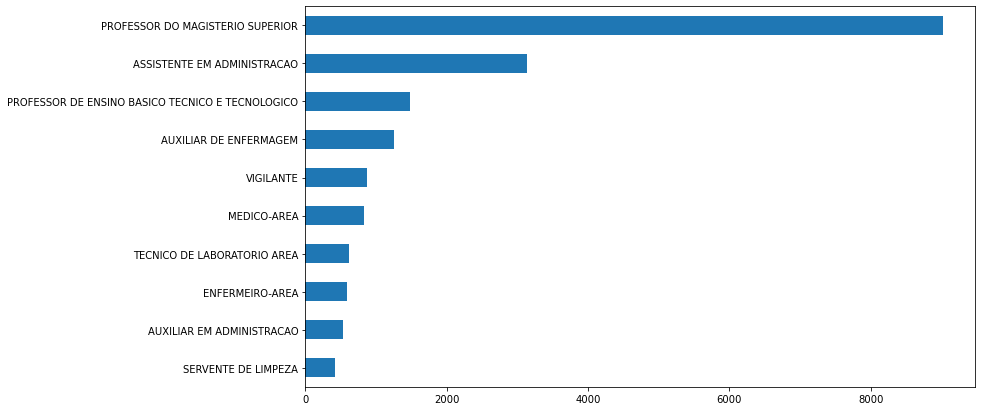

In [23]:
figure(figsize=(12, 7))
dados["descricao_cargo"].value_counts()[:10].sort_values().plot.barh()

In [24]:
dados.data_previsao_aposentadoria = pd.to_datetime(dados.data_previsao_aposentadoria)
dados.head()

,siape,nome_oficial,sexo,categoria,classe_funcional,descricao_cargo,unidade,locacao,data_previsao_aposentadoria,previsao_idade,regra_aposentadoria,ano_previsao_aposentadoria
0,2155224,ABNER CARLOS COSTA DE MELO,M,Técnico Administrativo,D,TECNICO EM ELETROTECNICA,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,2055-04-24,64,Voluntária por idade e tempo de contribuição -...,2055
1,2155224,ABNER CARLOS COSTA DE MELO,M,Técnico Administrativo,D,TECNICO EM ELETROTECNICA,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,2056-01-15,65,Voluntária por idade e tempo de contribuição,2056
2,2155224,ABNER CARLOS COSTA DE MELO,M,Técnico Administrativo,D,TECNICO EM ELETROTECNICA,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,2066-01-16,75,Compulsória,2066
3,1668850,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,M,Docente,Classe C - Adjunto,PROFESSOR DO MAGISTERIO SUPERIOR,CERES - DEPARTAMENTO DE HISTÓRIA,CERES - DEPARTAMENTO DE HISTÓRIA,2045-05-03,65,Voluntária por idade e tempo de contribuição,2045
4,1668850,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,M,Docente,Classe C - Adjunto,PROFESSOR DO MAGISTERIO SUPERIOR,CERES - DEPARTAMENTO DE HISTÓRIA,CERES - DEPARTAMENTO DE HISTÓRIA,2047-01-24,66,Voluntária por idade e tempo de contribuição -...,2047


In [25]:
# previsao de idade por cada classe funcional
# maiores medias de idades previstas:
# Classe A - Assistente A,
# Classe A - Adjunto A 
# Não Informada
dados.groupby('classe_funcional').agg({'previsao_idade':'mean'})

,previsao_idade
classe_funcional,
A,62.857965
B,63.159933
C,63.489410
Classe A - Adjunto A,69.437647
Classe A - Assistente A,69.145161
Classe A - Auxiliar,68.329032
Classe B - Assistente,68.439655
Classe C - Adjunto,67.285136
Classe D - Associado,66.359388


In [26]:
#  medias de idade por cada regra de aposentadoria 
dados.groupby('regra_aposentadoria').agg({'previsao_idade':'mean'})

,previsao_idade
regra_aposentadoria,
Aposentadoria especial - Exposição a agentes nocivos à saúde,66.000000
Aposentadoria especial por idade e tempo de deficiência,57.500000
Aposentadoria especial por tempo de contribuição - Deficiência Leve,55.500000
Compulsória,74.999075
"Magistério com totalidade da remuneração e paridade - Art 20, § 1º da EC103/2019 (Ensino fundamental/médio)",61.812500
"Magistério com totalidade da remuneração e paridade - Art 4º, § 4º da EC103/2019 (Ensino fundamental/médio)",62.913793
Magistério integral média sem paridade - Art 20 1° da EC 103/2019 (Ensino fundamental/médio),65.924731
Magistério por idade e tempo de contribuição (Ensino fundamental/médio),60.342857
"Magistério por idade e tempo de contribuição - Art 4º, § 4º da EC103/2019 (Ensino fundamental/médio)",63.235897


In [27]:
# Compulsória -> +- 74 anos
# Aposentadoria especial - Exposição a agentes nocivos à saúde -> +- 66 anos
# Magistério integral média sem paridade - Art 20 1° da EC 103/2019 (Ensino fundamental/médio)-> +-65 anos
# Voluntária com totalidade da remuneração e paridade - Art 4º da EC103/2019 -> +- 64.7
# Voluntária por idade e tempo de contribuição - Art 4º da EC103/2019 -> +- 64.6